In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
#from pydub import AudioSegment
#from pydub.playback import play

In [186]:
df = pd.read_csv("features_3_sec.csv")
labels=df['label']
num=0
one_hot_encode={}
labels_encoded=[]

for i in labels:
    if i not in one_hot_encode.keys():
        one_hot_encode[i]=num
        labels_encoded.append(num)
        num+=1
    else:
        labels_encoded.append(one_hot_encode[i])
df['labels_encoded']=labels_encoded
print(one_hot_encode)
df


{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,labels_encoded
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues,0
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues,0
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues,0
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues,0
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock,9
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock,9
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock,9
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock,9


In [187]:
#song = AudioSegment.from_wav("samples/classical.00013.wav")

#play(song)

In [188]:
X = df.copy()
X.drop(['filename', 'label','length'],axis=1,inplace=True)
display(X)
Y=pd.DataFrame(df['labels_encoded'])
display(Y)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,labels_encoded
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,0
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,0
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,0
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,0
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,8.479527e+05,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,9
9986,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,1.170890e+06,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,9
9987,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,2.602871e+06,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,9
9988,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,4.968878e+05,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,9


,labels_encoded
0,0
1,0
2,0
3,0
4,0
...,...
9985,9
9986,9
9987,9
9988,9


In [189]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1000, random_state=1234)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1000)

In [190]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(7990, 58)
(1000, 58)
(1000, 58)


In [191]:
sc = StandardScaler()
x_train = x_train.iloc[:,:-1]
x_test = x_test.iloc[:,:-1]
x_val = x_val.iloc[:,:-1]

x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)
x_test_scaled = sc.transform(x_test)


In [192]:
modelnn = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[57]),
      keras.layers.Dense(40, activation= 'relu'),
      keras.layers.Dense(20, activation= 'relu'),
      keras.layers.Dense(10, activation='softmax' )
])

In [257]:
modelnnscale = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[57]),
      keras.layers.Dense(40, activation= 'sigmoid'),
      keras.layers.Dense(20, activation= 'sigmoid'),
      keras.layers.Dense(10, activation='softmax' )
])

In [194]:
modelnn.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 57)                0         
                                                                 
 dense_80 (Dense)            (None, 40)                2320      
                                                                 
 dense_81 (Dense)            (None, 20)                820       
                                                                 
 dense_82 (Dense)            (None, 10)                210       
                                                                 
Total params: 3,350
Trainable params: 3,350
Non-trainable params: 0
_________________________________________________________________


In [244]:
modelnnscale.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 57)                0         
                                                                 
 dense_101 (Dense)           (None, 40)                2320      
                                                                 
 dense_102 (Dense)           (None, 20)                820       
                                                                 
 dense_103 (Dense)           (None, 10)                210       
                                                                 
Total params: 3,350
Trainable params: 3,350
Non-trainable params: 0
_________________________________________________________________


In [196]:
modelnn.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [258]:
modelnnscale.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [198]:
early_stopping_monitor = EarlyStopping(patience=2) 
history = modelnn.fit(x_train, y_train, epochs=850, batch_size=8990,validation_data=(x_val, y_val), callbacks=[early_stopping_monitor], verbose=2)

Epoch 1/850
1/1 - 1s - loss: 270668.7812 - accuracy: 0.0995 - val_loss: 239190.0469 - val_accuracy: 0.1060 - 810ms/epoch - 810ms/step
Epoch 2/850
1/1 - 0s - loss: 244022.7344 - accuracy: 0.1011 - val_loss: 213962.6875 - val_accuracy: 0.1130 - 96ms/epoch - 96ms/step
Epoch 3/850
1/1 - 0s - loss: 218769.2344 - accuracy: 0.1090 - val_loss: 207173.6406 - val_accuracy: 0.1080 - 98ms/epoch - 98ms/step
Epoch 4/850
1/1 - 0s - loss: 211571.9531 - accuracy: 0.1014 - val_loss: 200104.8750 - val_accuracy: 0.1070 - 88ms/epoch - 88ms/step
Epoch 5/850
1/1 - 0s - loss: 204455.5469 - accuracy: 0.1020 - val_loss: 190183.2344 - val_accuracy: 0.1080 - 65ms/epoch - 65ms/step
Epoch 6/850
1/1 - 0s - loss: 194607.5469 - accuracy: 0.1035 - val_loss: 178670.1406 - val_accuracy: 0.1080 - 77ms/epoch - 77ms/step
Epoch 7/850
1/1 - 0s - loss: 183168.8750 - accuracy: 0.1038 - val_loss: 166109.5000 - val_accuracy: 0.1110 - 42ms/epoch - 42ms/step
Epoch 8/850
1/1 - 0s - loss: 170662.3594 - accuracy: 0.1031 - val_loss: 15

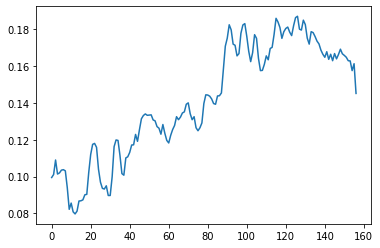

In [262]:
plt.plot(history.history['accuracy'])

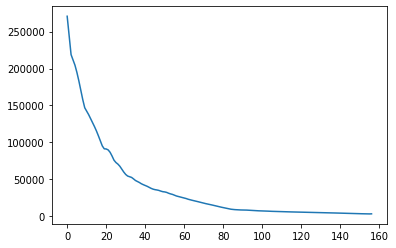

In [200]:
plt.plot(history.history['loss'])

In [259]:
early_stopping_monitor = EarlyStopping(patience=2) 
history_sc = modelnnscale.fit(x_train_scaled, y_train, epochs=1000, batch_size=8990,validation_data=(x_val_scaled, y_val), callbacks=[early_stopping_monitor], verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 2.4441 - accuracy: 0.1048 - val_loss: 2.4305 - val_accuracy: 0.1030 - 505ms/epoch - 505ms/step
Epoch 2/1000
1/1 - 0s - loss: 2.4333 - accuracy: 0.1060 - val_loss: 2.4203 - val_accuracy: 0.1060 - 42ms/epoch - 42ms/step
Epoch 3/1000
1/1 - 0s - loss: 2.4228 - accuracy: 0.1053 - val_loss: 2.4105 - val_accuracy: 0.1030 - 39ms/epoch - 39ms/step
Epoch 4/1000
1/1 - 0s - loss: 2.4127 - accuracy: 0.1053 - val_loss: 2.4009 - val_accuracy: 0.1020 - 45ms/epoch - 45ms/step
Epoch 5/1000
1/1 - 0s - loss: 2.4029 - accuracy: 0.1050 - val_loss: 2.3917 - val_accuracy: 0.1010 - 84ms/epoch - 84ms/step
Epoch 6/1000
1/1 - 0s - loss: 2.3934 - accuracy: 0.1051 - val_loss: 2.3828 - val_accuracy: 0.1020 - 89ms/epoch - 89ms/step
Epoch 7/1000
1/1 - 0s - loss: 2.3843 - accuracy: 0.1056 - val_loss: 2.3743 - val_accuracy: 0.1010 - 103ms/epoch - 103ms/step
Epoch 8/1000
1/1 - 0s - loss: 2.3755 - accuracy: 0.1054 - val_loss: 2.3660 - val_accuracy: 0.1020 - 104ms/epoch - 104ms/step
Epoch 9/10

Text(0.5, 1.0, 'Model Accuracy Vs No.of Epochs')

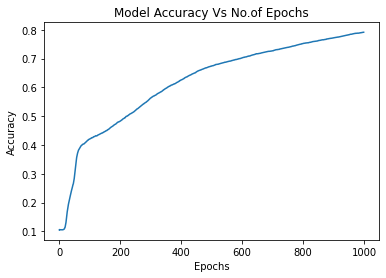

In [263]:
plt.plot(history_sc.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Vs No.of Epochs')

Text(0.5, 1.0, 'Loss Vs No.of Epochs')

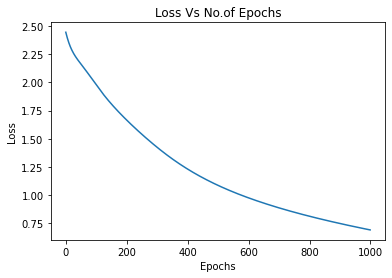

In [264]:
plt.plot(history_sc.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Vs No.of Epochs')

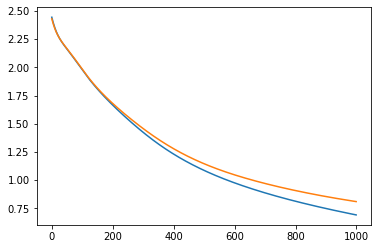

In [265]:
plt.plot(history_sc.history['loss'])
plt.plot(history_sc.history['val_loss'])

In [204]:
modelnn.evaluate(x_train, y_train)

250/250 [==============================] - 1s 2ms/step - loss: 3517.3347 - accuracy: 0.1615


[3517.334716796875, 0.1614518165588379]

In [205]:
modelnn.evaluate(x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 3384.2568 - accuracy: 0.1710


[3384.2568359375, 0.17100000381469727]

In [260]:
modelnnscale.evaluate(x_train_scaled, y_train)

250/250 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.7916


[0.6914979219436646, 0.7916145324707031]

In [261]:
modelnnscale.evaluate(x_test_scaled, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.8099 - accuracy: 0.7400


[0.8098755478858948, 0.7400000095367432]